In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


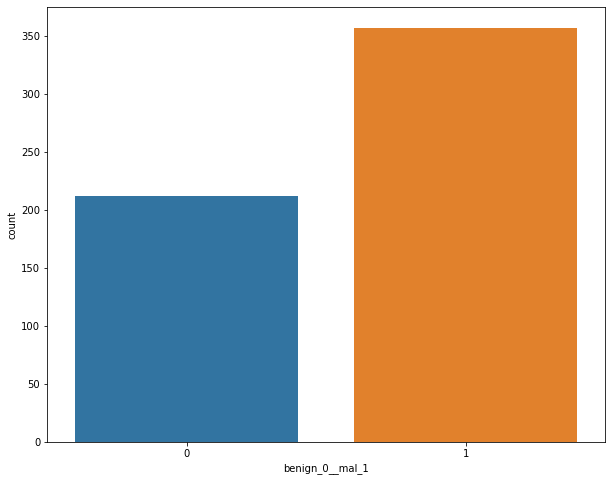

In [6]:
plt.figure(figsize=(10,8))
sns.countplot(x='benign_0__mal_1',data=df)
plt.show()

<AxesSubplot:>

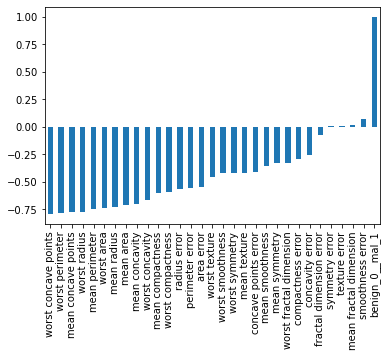

In [13]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

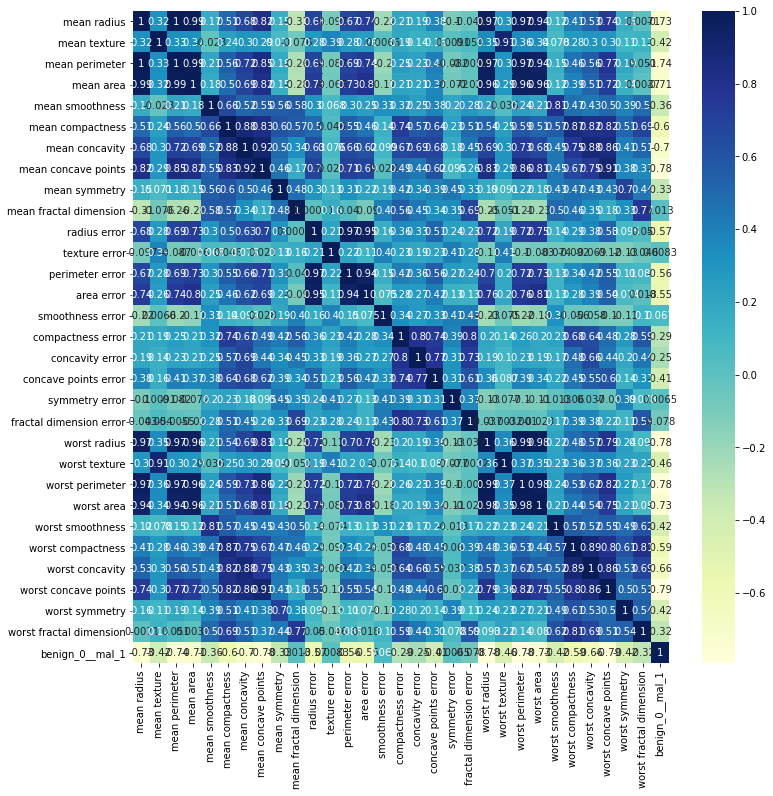

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [15]:
y = df['benign_0__mal_1']
X = df.drop('benign_0__mal_1',axis=1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)


In [21]:
X_test = scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten

In [26]:
X_train.shape

(426, 30)

In [51]:
model = Sequential()


model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))# since thiis is binary classification

In [52]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [43]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0192 - val_loss: 0.1043
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0189 - val_loss: 0.1041
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.0952
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0221 - val_loss: 0.1234
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0217 - val_loss: 0.0940
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.1194
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0211 - val_loss: 0.0998
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0218 - val_loss: 0.0982
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.1188
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0193 - val_loss: 0.0973
Epoch 11/

14/14 [==============================] - 0s 4ms/step - loss: 0.0127 - val_loss: 0.1211
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.1104
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.1079
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.1142
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.1005
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0214 - val_loss: 0.1675
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0965
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0139 - val_loss: 0.1271
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.1116
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.1211
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 0.1285
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.1349
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.1026
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.1617
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.1075
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.1819
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.1057
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.1589
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.1096
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0081 - val_loss: 0.1384
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.1445
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.1575
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.1534
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.1350
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.1667
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.1199
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 0.1719
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.1361
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.1515
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.1479
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.1771
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.1561
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.1765
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.1472
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.1942
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.1760
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.1633
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.1624
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.1693
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.1691
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.2124
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.1898
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.1944
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.1880
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.2206
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.1721
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.1843
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.2738
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.1858
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.2033
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 6.1834e-04 - val_loss: 0.2219
Epoch 487/600
14/14 [==============================] - 0s 4ms/step - loss: 6.1322e-04 - val_loss: 0.2225
Epoch 488/600
14/14 [==============================] - 0s 4ms/step - loss: 5.8136e-04 - val_loss: 0.2279
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 6.4576e-04 - val_loss: 0.2286
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 5.7693e-04 - val_loss: 0.2251
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 5.8381e-04 - val_loss: 0.2309
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 6.1388e-04 - val_loss: 0.2283
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 6.0927e-04 - val_loss: 0.2230
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 5.7569e-04 - val_loss: 0.2404
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - 

14/14 [==============================] - 0s 4ms/step - loss: 3.5905e-04 - val_loss: 0.2584
Epoch 565/600
14/14 [==============================] - 0s 4ms/step - loss: 3.5480e-04 - val_loss: 0.2606
Epoch 566/600
14/14 [==============================] - 0s 4ms/step - loss: 3.5186e-04 - val_loss: 0.2595
Epoch 567/600
14/14 [==============================] - 0s 4ms/step - loss: 3.4909e-04 - val_loss: 0.2592
Epoch 568/600
14/14 [==============================] - 0s 4ms/step - loss: 3.4362e-04 - val_loss: 0.2537
Epoch 569/600
14/14 [==============================] - 0s 3ms/step - loss: 3.4636e-04 - val_loss: 0.2580
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 3.8754e-04 - val_loss: 0.2630
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 3.6224e-04 - val_loss: 0.2681
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 3.7924e-04 - val_loss: 0.2564
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - 

In [44]:
losses=pd.DataFrame(model.history.history) 

<AxesSubplot:>

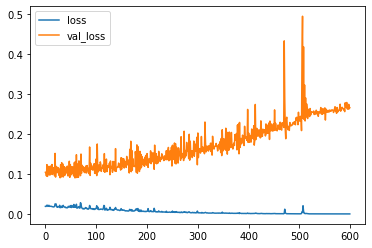

In [45]:
losses.plot()

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=25)

In [53]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6715 - val_loss: 0.6569
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6522 - val_loss: 0.6306
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6198 - val_loss: 0.5964
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5839 - val_loss: 0.5491
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5419 - val_loss: 0.4927
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4835 - val_loss: 0.4336
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4325 - val_loss: 0.3762
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3579 - val_loss: 0.3284
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3159 - val_loss: 0.2879
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2886 - val_loss: 0.2568
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0629 - val_loss: 0.1129
Epoch 00083: early stopping


In [54]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

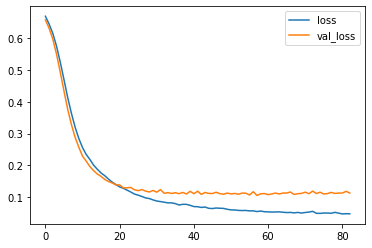

In [55]:
model_loss.plot()

In [56]:
from tensorflow.keras.layers import Dropout

In [57]:
model = Sequential()


model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))# since thiis is binary classification

model.compile(loss='binary_crossentropy',optimizer='adam')

In [58]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 35ms/step - loss: 0.7096 - val_loss: 0.6586
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6792 - val_loss: 0.6373
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6431 - val_loss: 0.6144
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6442 - val_loss: 0.5916
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6125 - val_loss: 0.5688
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6011 - val_loss: 0.5476
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5881 - val_loss: 0.5246
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5575 - val_loss: 0.4998
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5250 - val_loss: 0.4734
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5313 - val_loss: 0.4505
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.1062 - val_loss: 0.0970
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1268 - val_loss: 0.0931
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1022 - val_loss: 0.1135
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1031 - val_loss: 0.0998
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1135 - val_loss: 0.1046
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1056 - val_loss: 0.0941
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1209 - val_loss: 0.0920
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1294 - val_loss: 0.0980
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1162 - val_loss: 0.0923
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0966 - val_loss: 0.0975
Epoch 93/600


In [59]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

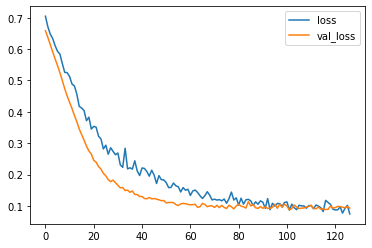

In [60]:
model_loss.plot()

In [65]:
predictions=model.predict_classes(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [68]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]


In [69]:
len(X_test)

143

In [70]:
55+88

143